In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer

In [2]:
data=pd.read_csv('E:/Ramya/brushUps/Basics/ML using sklearn/Projects/Wine_quality/data/winequality-white.csv',delimiter=';')

In [3]:
X=data.iloc[:,0:11]
y=data.iloc[:,11]

In [4]:
col_names=X.columns
scaler=preprocessing.MinMaxScaler()
normalized_list=scaler.fit_transform(X)
X=pd.DataFrame(normalized_list,columns=col_names)

In [5]:
from sklearn.metrics import r2_score
# adj_r2=1-((1-r2_score(y_pred,y))*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
# a_r2=make_scorer(adj_r2)
r2=make_scorer(r2_score)

In [6]:
solver_options=['newton-cg','lbfgs', 'sag', 'saga']
penalty=['l1','l2','elasticnet']
c=[100,10,1.0,0.1,0.01]
max_iter=[100,110,120,130,140]
grid_params={'solver':solver_options,'C':c,'penalty':penalty,'max_iter':max_iter}
logreg_cross_val_clf=GridSearchCV(LogisticRegression(multi_class='auto'),param_grid=grid_params,cv=10,return_train_score=False,scoring=r2)
logreg_cross_val_clf.fit(X,y)

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ramya\AppData\Local\Programs\Python

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [100, 110, 120, 130, 140],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring=make_scorer(r2_score))

In [7]:
logreg_cross_val_clf.best_params_

{'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [8]:
logreg_cross_val_clf.best_score_

0.15600010916796553

In [9]:
lreg=LogisticRegression(solver=logreg_cross_val_clf.best_params_['solver'],C=logreg_cross_val_clf.best_params_['C'],multi_class='auto',penalty=logreg_cross_val_clf.best_params_['penalty'],max_iter=logreg_cross_val_clf.best_params_['max_iter'])
y_pred=cross_val_predict(lreg,X,y,cv=10)

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which m

In [10]:
r2_value=r2_score(y,y_pred)
adj_r2=1-((1-r2_value)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))

In [11]:
r2_value

0.15672777705487984

In [12]:
adj_r2

0.15482929272160173

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

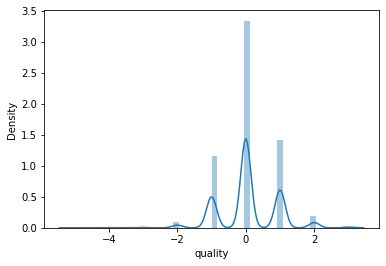

In [13]:
import seaborn as sns
sns.distplot(y-y_pred)